In [3]:
#import the required packages
import numpy as np
import pandas as pd
import math
from math import log
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#upload the csv file with name df (dataframe)
df = pd.read_csv("n_d.csv")

In [5]:
#checking the first five rows of our dataframe
df.head()

,nuc_id,H2AK5ac,H2AK5ac.1,H2AK5ac.2,H2AK5ac.3,H2AK5ac.4,H2AK5ac.5,H2AS129ph,H2AS129ph.1,H2AS129ph.2,...,Input3.1.3,Input3.1.4,Input3.1.5,Input3.2,Input3.2.1,Input3.2.2,Input3.2.3,Input3.2.4,Input3.2.5,Input3.3
0,0,0.00,4.00,8.00,15.00,30.00,60.00,0.00,4.00,8.00,...,15.00,30.00,60.00,0.00,4.00,8.00,15.00,30.00,60.00,0.00
1,3395,0.63,0.97,0.66,0.92,0.59,0.85,-1.41,-1.43,-0.88,...,6.92,6.86,6.75,6.93,6.65,6.93,6.79,6.78,6.79,7.11
2,3396,0.97,1.26,0.83,0.65,0.72,0.57,-0.70,-1.00,-1.10,...,7.54,7.47,7.33,7.12,7.33,7.15,7.56,7.53,7.49,7.56
3,3397,0.82,0.99,0.97,1.03,0.91,0.87,-1.03,-0.81,-0.80,...,6.83,6.89,7.03,7.01,6.87,6.95,7.02,6.92,6.76,7.34


In [6]:
#checking the header of columns in our dataframe
df.columns.values

array(['nuc_id', 'H2AK5ac', 'H2AK5ac.1', 'H2AK5ac.2', 'H2AK5ac.3',
       'H2AK5ac.4', 'H2AK5ac.5', 'H2AS129ph', 'H2AS129ph.1',
       'H2AS129ph.2', 'H2AS129ph.3', 'H2AS129ph.4', 'H2AS129ph.5',
       'H3K14ac', 'H3K14ac.1', 'H3K14ac.2', 'H3K14ac.3', 'H3K14ac.4',
       'H3K14ac.5', 'H3K18ac', 'H3K18ac.1', 'H3K18ac.2', 'H3K18ac.3',
       'H3K18ac.4', 'H3K18ac.5', 'H3K23ac', 'H3K23ac.1', 'H3K23ac.2',
       'H3K23ac.3', 'H3K23ac.4', 'H3K23ac.5', 'H3K27ac', 'H3K27ac.1',
       'H3K27ac.2', 'H3K27ac.3', 'H3K27ac.4', 'H3K27ac.5', 'H3K36me',
       'H3K36me.1', 'H3K36me.2', 'H3K36me.3', 'H3K36me.4', 'H3K36me.5',
       'H3K36me2', 'H3K36me2.1', 'H3K36me2.2', 'H3K36me2.3', 'H3K36me2.4',
       'H3K36me2.5', 'H3K36me3', 'H3K36me3.1', 'H3K36me3.2', 'H3K36me3.3',
       'H3K36me3.4', 'H3K36me3.5', 'H3K4ac', 'H3K4ac.1', 'H3K4ac.2',
       'H3K4ac.3', 'H3K4ac.4', 'H3K4ac.5', 'H3K4me', 'H3K4me.1',
       'H3K4me.2', 'H3K4me.3', 'H3K4me.4', 'H3K4me.5', 'H3K4me2',
       'H3K4me2.1', 'H3K4me2.2', 

In [7]:
#optional-information of df according to columns
df.info

<bound method DataFrame.info of    nuc_id  H2AK5ac  H2AK5ac.1  H2AK5ac.2  H2AK5ac.3  H2AK5ac.4  H2AK5ac.5  \
0       0     0.00       4.00       8.00      15.00      30.00      60.00   
1    3395     0.63       0.97       0.66       0.92       0.59       0.85   
2    3396     0.97       1.26       0.83       0.65       0.72       0.57   
3    3397     0.82       0.99       0.97       1.03       0.91       0.87   

   H2AS129ph  H2AS129ph.1  H2AS129ph.2  ...  Input3.1.3  Input3.1.4  \
0       0.00         4.00         8.00  ...       15.00       30.00   
1      -1.41        -1.43        -0.88  ...        6.92        6.86   
2      -0.70        -1.00        -1.10  ...        7.54        7.47   
3      -1.03        -0.81        -0.80  ...        6.83        6.89   

   Input3.1.5  Input3.2  Input3.2.1  Input3.2.2  Input3.2.3  Input3.2.4  \
0       60.00      0.00        4.00        8.00       15.00       30.00   
1        6.75      6.93        6.65        6.93        6.79        6.78   
2

In [8]:
df.describe() #not required

,nuc_id,H2AK5ac,H2AK5ac.1,H2AK5ac.2,H2AK5ac.3,H2AK5ac.4,H2AK5ac.5,H2AS129ph,H2AS129ph.1,H2AS129ph.2,...,Input3.1.3,Input3.1.4,Input3.1.5,Input3.2,Input3.2.1,Input3.2.2,Input3.2.3,Input3.2.4,Input3.2.5,Input3.3
count,4.000000,4.000000,4.000000,4.000000,4.00000,4.00000,4.00000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000
mean,2547.000000,0.605000,1.805000,2.615000,4.40000,8.05500,15.57250,-0.785000,0.190000,1.305000,...,9.072500,12.805000,20.277500,5.265000,6.212500,7.257500,9.092500,12.807500,20.26000,5.502500
std,1698.000196,0.426654,1.469297,3.592237,7.06847,14.63059,29.61865,0.598359,2.553207,4.465135,...,3.964252,11.466771,26.482726,3.510864,1.501963,0.504868,3.951535,11.466291,26.49548,3.672931
min,0.000000,0.000000,0.970000,0.660000,0.65000,0.59000,0.57000,-1.410000,-1.430000,-1.100000,...,6.830000,6.860000,6.750000,0.000000,4.000000,6.930000,6.790000,6.780000,6.76000,0.000000
25%,2546.250000,0.472500,0.985000,0.787500,0.85250,0.68750,0.78000,-1.125000,-1.107500,-0.935000,...,6.897500,6.882500,6.960000,5.197500,5.987500,6.945000,6.962500,6.885000,6.78250,5.332500
50%,3395.500000,0.725000,1.125000,0.900000,0.97500,0.81500,0.86000,-0.865000,-0.905000,-0.840000,...,7.230000,7.180000,7.180000,6.970000,6.760000,7.050000,7.290000,7.225000,7.14000,7.225000
75%,3396.250000,0.857500,1.945000,2.727500,4.52250,8.18250,15.65250,-0.525000,0.392500,1.400000,...,9.405000,13.102500,20.497500,7.037500,6.985000,7.362500,9.420000,13.147500,20.61750,7.395000
max,3397.000000,0.970000,4.000000,8.000000,15.00000,30.00000,60.00000,0.000000,4.000000,8.000000,...,15.000000,30.000000,60.000000,7.120000,7.330000,8.000000,15.000000,30.000000,60.00000,7.560000


In [9]:
#trying new way to add a row or column in the existing dataframe
import csv
from csv import writer

In [10]:
#changing the index from numbers to the column containing nucleosome id
df.set_index('nuc_id', inplace=True)

In [11]:
#checking the new dataframe
df.head()

,H2AK5ac,H2AK5ac.1,H2AK5ac.2,H2AK5ac.3,H2AK5ac.4,H2AK5ac.5,H2AS129ph,H2AS129ph.1,H2AS129ph.2,H2AS129ph.3,...,Input3.1.3,Input3.1.4,Input3.1.5,Input3.2,Input3.2.1,Input3.2.2,Input3.2.3,Input3.2.4,Input3.2.5,Input3.3
nuc_id,,,,,,,,,,,,,,,,,,,,,
0,0.00,4.00,8.00,15.00,30.00,60.00,0.00,4.00,8.00,15.00,...,15.00,30.00,60.00,0.00,4.00,8.00,15.00,30.00,60.00,0.00
3395,0.63,0.97,0.66,0.92,0.59,0.85,-1.41,-1.43,-0.88,-1.15,...,6.92,6.86,6.75,6.93,6.65,6.93,6.79,6.78,6.79,7.11
3396,0.97,1.26,0.83,0.65,0.72,0.57,-0.70,-1.00,-1.10,-1.23,...,7.54,7.47,7.33,7.12,7.33,7.15,7.56,7.53,7.49,7.56
3397,0.82,0.99,0.97,1.03,0.91,0.87,-1.03,-0.81,-0.80,-0.73,...,6.83,6.89,7.03,7.01,6.87,6.95,7.02,6.92,6.76,7.34


In [12]:
#since it will be easier to add a column of information of particular modification, we will transpose the dataframe with the following command
dfn = df.transpose()

In [13]:
#checking first five rows of our new dataframe
dfn.head()

nuc_id,0,3395,3396,3397
H2AK5ac,0.0,0.63,0.97,0.82
H2AK5ac.1,4.0,0.97,1.26,0.99
H2AK5ac.2,8.0,0.66,0.83,0.97
H2AK5ac.3,15.0,0.92,0.65,1.03
H2AK5ac.4,30.0,0.59,0.72,0.91


In [14]:
dfn.tail() #not required

nuc_id,0,3395,3396,3397
Input3.2.2,8.0,6.93,7.15,6.95
Input3.2.3,15.0,6.79,7.56,7.02
Input3.2.4,30.0,6.78,7.53,6.92
Input3.2.5,60.0,6.79,7.49,6.76
Input3.3,0.0,7.11,7.56,7.34


In [15]:
#checking the header of columns of our new transposed dataframe
dfn.columns.values

array([   0, 3395, 3396, 3397], dtype=int64)

In [16]:
dfn.columns = list(map(str, dfn.columns)) #took that from somewhere, it suprisingly let me edit the header of column

In [17]:
dfn.head()

,0,3395,3396,3397
H2AK5ac,0.0,0.63,0.97,0.82
H2AK5ac.1,4.0,0.97,1.26,0.99
H2AK5ac.2,8.0,0.66,0.83,0.97
H2AK5ac.3,15.0,0.92,0.65,1.03
H2AK5ac.4,30.0,0.59,0.72,0.91


In [18]:
dfn.rename(columns={'0':'time','3395':'nuc-3','3396':'nuc-2','3397':'nuc-1'},inplace = 'True')

In [19]:
dfn.head()

,time,nuc-3,nuc-2,nuc-1
H2AK5ac,0.0,0.63,0.97,0.82
H2AK5ac.1,4.0,0.97,1.26,0.99
H2AK5ac.2,8.0,0.66,0.83,0.97
H2AK5ac.3,15.0,0.92,0.65,1.03
H2AK5ac.4,30.0,0.59,0.72,0.91


In [20]:
#define a new column with the following 
dfn['c'] = (2**dfn['nuc-3']+2**dfn['nuc-2']+2**dfn['nuc-1'])

In [21]:
dfn['2pn3'] =2**dfn['nuc-3']

In [22]:
dfn['2pn2']=2**dfn['nuc-2']

In [23]:
dfn['2pn1']=2**dfn['nuc-1']

In [24]:
dfn.head()

,time,nuc-3,nuc-2,nuc-1,c,2pn3,2pn2,2pn1
H2AK5ac,0.0,0.63,0.97,0.82,5.271812,1.547565,1.958841,1.765406
H2AK5ac.1,4.0,0.97,1.26,0.99,6.339983,1.958841,2.394957,1.986185
H2AK5ac.2,8.0,0.66,0.83,0.97,5.316609,1.580083,1.777685,1.958841
H2AK5ac.3,15.0,0.92,0.65,1.03,5.503308,1.892115,1.569168,2.042024
H2AK5ac.4,30.0,0.59,0.72,0.91,5.031474,1.505247,1.647182,1.879045


In [25]:
dfn['p-3']=dfn['2pn3']/dfn['c']
dfn['p-2']=dfn['2pn2']/dfn['c']
dfn['p-1']=dfn['2pn1']/dfn['c']

In [26]:
s = []
for i in dfn['p-3']:
    y = math.log2(i)
    s.append(y)
print(s)

dfn['l-3']= s

m = []
for i in dfn['p-2']:
    y = math.log2(i)
    m.append(y)
print(m)

dfn['l-2']=m

n = []
for i in dfn['p-1']:
    y = math.log2(i)
    n.append(y)
print(n)

dfn['l-1']=n

[-1.7682988082091486, -1.6944789708615642, -1.7505062563963913, -1.540299005299858, -1.7409811883699153, -1.504646066837506, -1.9771502024590561, -1.9575835979384264, -1.543784629613612, -1.715447625972668, -1.9042749505738716, -1.8308790795513579, -1.4786360215911727, -1.6846092852570251, -1.487486756664614, -1.6123348880409445, -1.7392828844525192, -1.6669564285653897, -1.3972576877267757, -1.3842697755609716, -1.5069248844564016, -1.3437796171593699, -1.2594068059850216, -1.240984036082015, -1.372906594761749, -1.272256351389896, -1.435112360396012, -1.4361219951795303, -1.5602729692704962, -1.3761236774536103, -1.464448147095892, -1.5744414317655764, -1.6387808292129935, -1.4302613934454167, -1.4472244482304812, -1.4931499679627647, -1.7490173748375062, -2.041578662453717, -1.7155479463126508, -1.8835452740008822, -2.004013903166684, -1.8820307167300772, -1.67635715281433, -2.428230373842032, -1.9017925819426127, -2.2674329929823824, -2.122978403105471, -2.171167826392982, -1.75342

In [27]:
dfn.head()

,time,nuc-3,nuc-2,nuc-1,c,2pn3,2pn2,2pn1,p-3,p-2,p-1,l-3,l-2,l-1
H2AK5ac,0.0,0.63,0.97,0.82,5.271812,1.547565,1.958841,1.765406,0.293555,0.371569,0.334877,-1.768299,-1.428299,-1.578299
H2AK5ac.1,4.0,0.97,1.26,0.99,6.339983,1.958841,2.394957,1.986185,0.308966,0.377755,0.313279,-1.694479,-1.404479,-1.674479
H2AK5ac.2,8.0,0.66,0.83,0.97,5.316609,1.580083,1.777685,1.958841,0.297197,0.334365,0.368438,-1.750506,-1.580506,-1.440506
H2AK5ac.3,15.0,0.92,0.65,1.03,5.503308,1.892115,1.569168,2.042024,0.343814,0.285132,0.371054,-1.540299,-1.810299,-1.430299
H2AK5ac.4,30.0,0.59,0.72,0.91,5.031474,1.505247,1.647182,1.879045,0.299166,0.327376,0.373458,-1.740981,-1.610981,-1.420981


In [28]:
dfn['information']= -((dfn['p-3']*dfn['l-3'])+(dfn['p-2']*dfn['l-2'])+(dfn['p-1']*dfn['l-1']))

In [29]:
dfn

,time,nuc-3,nuc-2,nuc-1,c,2pn3,2pn2,2pn1,p-3,p-2,p-1,l-3,l-2,l-1,information
H2AK5ac,0.0,0.63,0.97,0.82,5.271812,1.547565,1.958841,1.765406,0.293555,0.371569,0.334877,-1.768299,-1.428299,-1.578299,1.578339
H2AK5ac.1,4.0,0.97,1.26,0.99,6.339983,1.958841,2.394957,1.986185,0.308966,0.377755,0.313279,-1.694479,-1.404479,-1.674479,1.578665
H2AK5ac.2,8.0,0.66,0.83,0.97,5.316609,1.580083,1.777685,1.958841,0.297197,0.334365,0.368438,-1.750506,-1.580506,-1.440506,1.579449
H2AK5ac.3,15.0,0.92,0.65,1.03,5.503308,1.892115,1.569168,2.042024,0.343814,0.285132,0.371054,-1.540299,-1.810299,-1.430299,1.576469
H2AK5ac.4,30.0,0.59,0.72,0.91,5.031474,1.505247,1.647182,1.879045,0.299166,0.327376,0.373458,-1.740981,-1.610981,-1.420981,1.578916
H2AK5ac.5,60.0,0.85,0.57,0.87,5.114687,1.802501,1.484524,1.827663,0.352417,0.290247,0.357336,-1.504646,-1.784646,-1.484646,1.578769
H2AS129ph,0.0,-1.41,-0.70,-1.03,1.481594,0.376312,0.615572,0.489710,0.253991,0.415480,0.330529,-1.977150,-1.267150,-1.597150,1.556559
H2AS129ph.1,4.0,-1.43,-1.00,-0.81,1.441513,0.371131,0.500000,0.570382,0.257459,0.346858,0.395683,-1.957584,-1.527584,-1.337584,1.563111
H2AS129ph.2,8.0,-0.88,-1.10,-0.80,1.584233,0.543367,0.466516,0.574349,0.342985,0.294475,0.362541,-1.543785,-1.763785,-1.463785,1.579566
H2AS129ph.3,15.0,-1.15,-1.23,-0.73,1.479847,0.450625,0.426317,0.602904,0.304508,0.288082,0.407410,-1.715448,-1.795448,-1.295448,1.567382


In [30]:
dfn.head()

,time,nuc-3,nuc-2,nuc-1,c,2pn3,2pn2,2pn1,p-3,p-2,p-1,l-3,l-2,l-1,information
H2AK5ac,0.0,0.63,0.97,0.82,5.271812,1.547565,1.958841,1.765406,0.293555,0.371569,0.334877,-1.768299,-1.428299,-1.578299,1.578339
H2AK5ac.1,4.0,0.97,1.26,0.99,6.339983,1.958841,2.394957,1.986185,0.308966,0.377755,0.313279,-1.694479,-1.404479,-1.674479,1.578665
H2AK5ac.2,8.0,0.66,0.83,0.97,5.316609,1.580083,1.777685,1.958841,0.297197,0.334365,0.368438,-1.750506,-1.580506,-1.440506,1.579449
H2AK5ac.3,15.0,0.92,0.65,1.03,5.503308,1.892115,1.569168,2.042024,0.343814,0.285132,0.371054,-1.540299,-1.810299,-1.430299,1.576469
H2AK5ac.4,30.0,0.59,0.72,0.91,5.031474,1.505247,1.647182,1.879045,0.299166,0.327376,0.373458,-1.740981,-1.610981,-1.420981,1.578916


In [31]:
ndf = dfn[(dfn.time == 0)]

In [32]:
ndf.drop(ndf.tail(9).index,inplace = True)

C:\Users\Ritika Aggarwal\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
ndf

,time,nuc-3,nuc-2,nuc-1,c,2pn3,2pn2,2pn1,p-3,p-2,p-1,l-3,l-2,l-1,information
H2AK5ac,0.0,0.63,0.97,0.82,5.271812,1.547565,1.958841,1.765406,0.293555,0.371569,0.334877,-1.768299,-1.428299,-1.578299,1.578339
H2AS129ph,0.0,-1.41,-0.70,-1.03,1.481594,0.376312,0.615572,0.489710,0.253991,0.415480,0.330529,-1.977150,-1.267150,-1.597150,1.556559
H3K14ac,0.0,0.97,1.04,0.53,5.458997,1.958841,2.056228,1.443929,0.358828,0.376668,0.264504,-1.478636,-1.408636,-1.918636,1.568651
H3K18ac,0.0,1.41,1.46,0.67,6.999528,2.657372,2.751084,1.591073,0.379650,0.393038,0.227311,-1.397258,-1.347258,-2.137258,1.545816
H3K23ac,0.0,0.95,0.88,0.30,5.003392,1.931873,1.840375,1.231144,0.386113,0.367826,0.246062,-1.372907,-1.442907,-2.022907,1.558595
H3K27ac,0.0,0.56,0.57,0.15,4.068362,1.474269,1.484524,1.109569,0.362374,0.364895,0.272731,-1.464448,-1.454448,-1.874448,1.572619
H3K36me,0.0,0.21,0.56,0.33,3.887971,1.156688,1.474269,1.257013,0.297504,0.379187,0.323308,-1.749017,-1.399017,-1.629017,1.577505
H3K36me2,0.0,0.29,0.43,0.42,3.907801,1.222640,1.347234,1.337928,0.312872,0.344755,0.342373,-1.676357,-1.536357,-1.546357,1.583583
H3K36me3,0.0,-1.37,-1.26,-1.00,1.304435,0.386891,0.417544,0.500000,0.296597,0.320096,0.383308,-1.753425,-1.643425,-1.383425,1.576391
H3K4ac,0.0,1.30,1.36,0.51,6.453191,2.462289,2.566852,1.424050,0.381561,0.397765,0.220674,-1.390013,-1.330013,-2.180013,1.540479


In [34]:
df2 = ndf["information"]

In [35]:
df2.index

Index(['H2AK5ac', 'H2AS129ph', 'H3K14ac', 'H3K18ac', 'H3K23ac', 'H3K27ac',
       'H3K36me', 'H3K36me2', 'H3K36me3', 'H3K4ac', 'H3K4me', 'H3K4me2',
       'H3K4me3', 'H3K56ac', 'H3K79me', 'H3K79me3', 'H3K9ac', 'H3S10ph',
       'H4K12ac', 'H4K16ac', 'H4K20me', 'H4K5ac', 'H4K8ac', 'H4R3me',
       'H4R3me2s', 'Htz1'],
      dtype='object')

In [36]:
df2.to_csv(r'C:\Users\Ritika Aggarwal\Desktop\Course project by prof ranjith padinhateeri\modelling notebooks\Project phase 2\modification_information_dataset.csv')

C:\Users\Ritika Aggarwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [37]:
df2.columns = ['Histone_modification','Information']

In [38]:
df2

H2AK5ac      1.578339
H2AS129ph    1.556559
H3K14ac      1.568651
H3K18ac      1.545816
H3K23ac      1.558595
H3K27ac      1.572619
H3K36me      1.577505
H3K36me2     1.583583
H3K36me3     1.576391
H3K4ac       1.540479
H3K4me       1.562438
H3K4me2      1.583266
H3K4me3      1.532089
H3K56ac      1.563332
H3K79me      1.581454
H3K79me3     1.582855
H3K9ac       1.553129
H3S10ph      1.547775
H4K12ac      1.581038
H4K16ac      1.556063
H4K20me      1.558400
H4K5ac       1.576645
H4K8ac       1.577422
H4R3me       1.582401
H4R3me2s     1.568175
Htz1         1.557546
Name: information, dtype: float64

In [39]:
list1 = []
for i in df2.iloc[:,]:
    list1.append(i)
print(list1)

list11 = sorted(list1)
list111 = []
for i in list11:
    y = round(i,2)
    list111.append(y)
    
print(list111)
    

[1.578338881624846, 1.5565585251978948, 1.5686512515556739, 1.5458162447723856, 1.558594638113782, 1.572619007928434, 1.5775048122536677, 1.5835829186844887, 1.5763909393758413, 1.5404791100110722, 1.5624383403416031, 1.5832656337164734, 1.5320889689883557, 1.5633317016050021, 1.5814542294228455, 1.5828553624972188, 1.5531286572613403, 1.5477750166252007, 1.5810376294362614, 1.556063030807215, 1.5583997875925262, 1.5766446564322936, 1.5774219674334304, 1.5824013996291661, 1.5681752474975834, 1.5575463193843104]
[1.53, 1.54, 1.55, 1.55, 1.55, 1.56, 1.56, 1.56, 1.56, 1.56, 1.56, 1.56, 1.57, 1.57, 1.57, 1.58, 1.58, 1.58, 1.58, 1.58, 1.58, 1.58, 1.58, 1.58, 1.58, 1.58]


In [40]:
list2 = []
for i in df2.index:
    list2.append(i)
print(list2)

['H2AK5ac', 'H2AS129ph', 'H3K14ac', 'H3K18ac', 'H3K23ac', 'H3K27ac', 'H3K36me', 'H3K36me2', 'H3K36me3', 'H3K4ac', 'H3K4me', 'H3K4me2', 'H3K4me3', 'H3K56ac', 'H3K79me', 'H3K79me3', 'H3K9ac', 'H3S10ph', 'H4K12ac', 'H4K16ac', 'H4K20me', 'H4K5ac', 'H4K8ac', 'H4R3me', 'H4R3me2s', 'Htz1']


In [41]:
plt.figure(figsize =(50,10))
plt.bar(list2,list11)
plt.xlabel('Histone modification',fontsize=25) 
plt.ylim([1.50,1.60])
plt.ylabel('Information',fontsize = 40)
plt.xticks(fontsize=17)
plt.yticks(fontsize = 20)
for index, value in enumerate(list111):
    plt.text(value, index, str(value))
plt.suptitle('Information for different Histone modifications',fontsize = 30)
plt.show()

ValueError: Image size of 2900x135924 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3600x720 with 1 Axes>

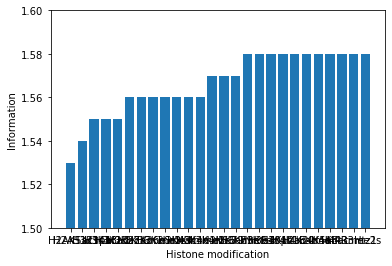

<Figure size 1440x720 with 0 Axes>

In [42]:
plt.bar(list2,list111)
plt.xlabel('Histone modification') 
plt.ylim([1.50,1.60])
plt.ylabel('Information')
plt.figure(figsize=(20,10)) 
plt.suptitle('Information for different Histone modifications',fontsize = 30)
plt.show()